<a href="https://colab.research.google.com/github/1NarendraSingh1/BOM-Business-Analyst---Technical-Case-Study-Assignment/blob/main/Python_Based_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_excel("/content/drive/MyDrive/Files Data science/BOM_Sample_Data_1.xlsx")

In [11]:
df.head()

,Order No,Order Date,Order Type,State,City,Quantity,Invoiced In Base Currency,Channel Name,Actual SP,ASP,...,Brand,Gender,Fit,Profit,COGS,ROS,DOH,DOH_grouping,Age Bucket,Tier
0,65468080,2024-08-29 01:43:00,COD,Andaman & Nicobar Islands,South Andaman,1,499.0,BEWAKOOF,499.0,499.0,...,Bewakoof,Unisex,-,305.0,194.0,3.166667,104.210526,more than 30 DOH,Bestseller,TIER-2
1,65211090,2024-03-08 12:48:00,COD,Andaman & Nicobar Islands,North and Middle Andaman,1,371.0,BEWAKOOF,371.0,371.0,...,Bewakoof,Unisex,-,192.0,179.0,7.533333,55.884956,more than 30 DOH,New (30 - 90),TIER-2
2,65490360,2024-08-31 22:19:00,PREPAID,Andaman & Nicobar Islands,South Andaman,1,332.0,BEWAKOOF,332.0,332.0,...,Bewakoof,Unisex,-,162.0,170.0,5.900000,25.932203,10-30 DOH,Bestseller,TIER-2
3,65458852,2024-08-27 21:47:00,PREPAID,Andaman & Nicobar Islands,South Andaman,1,299.0,BEWAKOOF,299.0,299.0,...,Bewakoof,Unisex,-,121.0,178.0,4.000000,12.500000,10-30 DOH,New (30 - 90),TAIL
4,65382090,2024-08-18 16:45:00,COD,Andaman & Nicobar Islands,South Andaman,1,449.0,BEWAKOOF,449.0,449.0,...,Bewakoof,Unisex,-,271.0,178.0,0.466667,501.428571,more than 30 DOH,New (0 - 30),NTBE


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17047 entries, 0 to 17046
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order No                   17047 non-null  object        
 1   Order Date                 17047 non-null  datetime64[ns]
 2   Order Type                 17047 non-null  object        
 3   State                      17047 non-null  object        
 4   City                       17047 non-null  object        
 5   Quantity                   17047 non-null  int64         
 6   Invoiced In Base Currency  17047 non-null  float64       
 7   Channel Name               17047 non-null  object        
 8   Actual SP                  17047 non-null  float64       
 9   ASP                        17047 non-null  float64       
 10  GST                        17047 non-null  float64       
 11  After Tax                  17047 non-null  float64       
 12  PID 

#**Customer Acquisition vs Retention**

In [13]:
# Extract relevant columns
df_orders = df[['Order No', 'Order Type', 'Channel Name', 'Invoiced In Base Currency', 'Profit']]

In [14]:
# Compute Customer Acquisition vs Retention Metrics
total_orders = df_orders.groupby('Channel Name')['Order No'].count()
unique_customers = df_orders.groupby('Channel Name')['Order No'].nunique()
repeat_orders = total_orders - unique_customers
retention_rate = (repeat_orders / total_orders) * 100

In [15]:
# Combine into a summary DataFrame
retention_summary = pd.DataFrame({
    'Total Orders': total_orders,
    'Unique Customers': unique_customers,
    'Repeat Orders': repeat_orders,
    'Retention Rate (%)': retention_rate
}).reset_index()

In [16]:
retention_summary

,Channel Name,Total Orders,Unique Customers,Repeat Orders,Retention Rate (%)
0,BEWAKOOF,4055,4043,12,0.295931
1,FLIPKART,546,546,0,0.000000
2,FLIPKART_BK_BLR_SHR,397,397,0,0.000000
3,FLIPKART_BK_KOL_SHR,437,437,0,0.000000
4,FLIPKART_BK_PROZO_BHIWANDI,1156,1156,0,0.000000
5,MYNTRA,1888,1856,32,1.694915
6,MYNTRAPPMP_BK_BLR_SHR,1762,1762,0,0.000000
7,MYNTRAPPMP_BK_KOL_SHR,1311,1311,0,0.000000
8,MYNTRAPPMP_BK_PROZO_BHIWANDI,2559,2559,0,0.000000
9,MYNTRAPPMP_BK_PROZO_GURGAON,1026,1026,0,0.000000


**Customer Retention Analysis**

- The first chart shows the total orders, unique customers, and repeat orders per marketplace.
- The second chart highlights the retention rate across different marketplaces.

<ipython-input-25-2d5922590873>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retention_summary, x="Channel Name", y="Retention Rate (%)", ax=axes[1], palette="coolwarm")
<ipython-input-25-2d5922590873>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


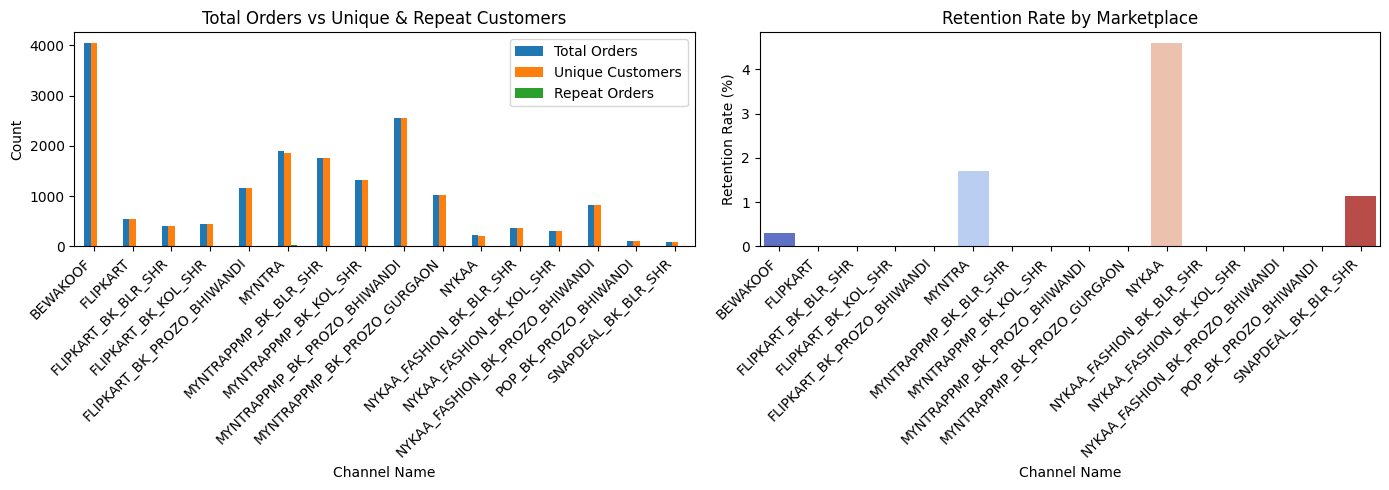

In [25]:
# Figure 1: Customer Retention Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Bar chart for total orders, unique customers, and repeat orders
retention_summary.set_index("Channel Name")[["Total Orders", "Unique Customers", "Repeat Orders"]].plot(kind="bar", stacked=False, ax=axes[0])
axes[0].set_title("Total Orders vs Unique & Repeat Customers")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
# Bar chart for retention rate
sns.barplot(data=retention_summary, x="Channel Name", y="Retention Rate (%)", ax=axes[1], palette="coolwarm")
axes[1].set_title("Retention Rate by Marketplace")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

**Customer Acquisition vs. Retention**

- Bewakoof has the highest repeat orders, but its retention rate is still low (~0.3%).
- Flipkart and other marketplace channels have no repeat customers in this dataset, meaning all customers are unique.



**Observations & Suggestions:**



*   The low retention rate suggests that customers are not returning for repeat purchases.
*   Implement loyalty programs, discounts for repeat buyers, or subscription models to improve retention.

#**Marketplace Efficiency: COD vs Prepaid Orders**

In [22]:
# Compute Marketplace Efficiency Metrics (COD vs Prepaid)
efficiency_summary = df_orders.groupby(['Channel Name', 'Order Type']).agg(
    Total_Sales=('Invoiced In Base Currency', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Compute average profit margin
efficiency_summary['Avg Profit Margin (%)'] = (efficiency_summary['Total_Profit'] / efficiency_summary['Total_Sales']) * 100
efficiency_summary

,Channel Name,Order Type,Total_Sales,Total_Profit,Avg Profit Margin (%)
0,BEWAKOOF,COD,1597653.85,832346.350000,52.098041
1,BEWAKOOF,PREPAID,1256195.81,605522.143333,48.202847
2,BEWAKOOF,Prepaid,224224.05,111677.050000,49.806009
3,FLIPKART,COD,220640.00,114581.000000,51.931200
4,FLIPKART,Prepaid,156874.00,81206.000000,51.765111
5,FLIPKART_BK_BLR_SHR,COD,179119.50,91401.500000,51.028224
6,FLIPKART_BK_BLR_SHR,PREPAID,98433.00,49907.000000,50.701492
7,FLIPKART_BK_KOL_SHR,COD,233047.00,126657.000000,54.348265
8,FLIPKART_BK_KOL_SHR,PREPAID,81157.00,41992.000000,51.741686
9,FLIPKART_BK_PROZO_BHIWANDI,COD,597818.00,300060.000000,50.192534


**Marketplace Efficiency (COD vs. Prepaid Orders)**

- The first chart compares total sales and total profit by order type (COD vs. Prepaid) across marketplaces.
- The second chart illustrates the average profit margin for COD and Prepaid orders.

<ipython-input-23-5816b863589d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-23-5816b863589d>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


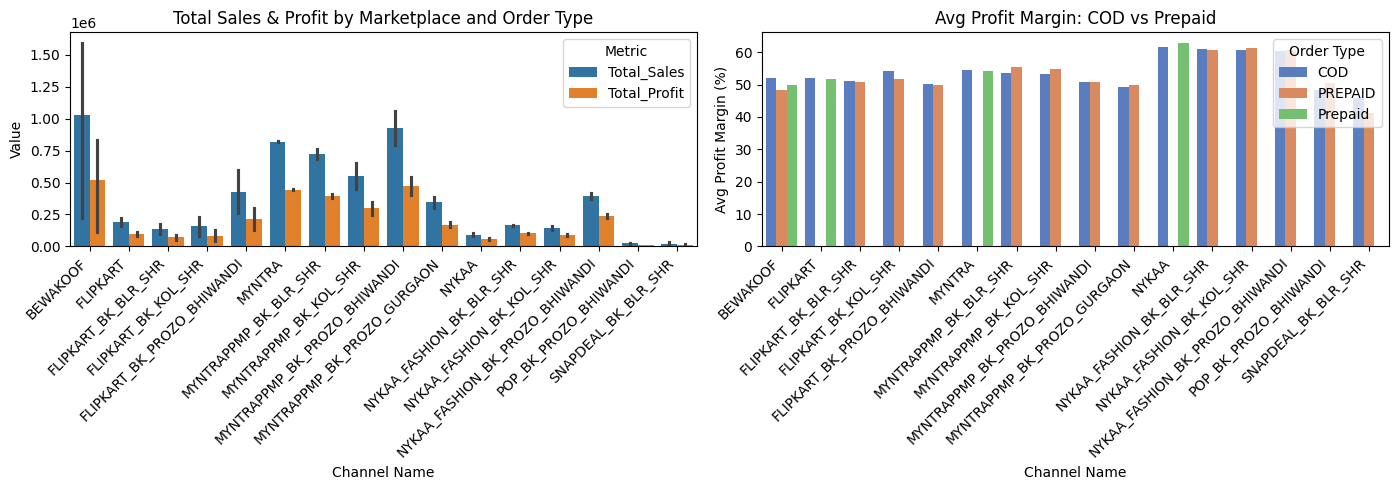

In [23]:
# Figure 2: Marketplace Efficiency (COD vs. Prepaid)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for total sales and profit by order type
efficiency_summary_melted = efficiency_summary.melt(id_vars=["Channel Name", "Order Type"],
                                                    value_vars=["Total_Sales", "Total_Profit"],
                                                    var_name="Metric", value_name="Value")
sns.barplot(data=efficiency_summary_melted, x="Channel Name", y="Value", hue="Metric", ax=axes[0])
axes[0].set_title("Total Sales & Profit by Marketplace and Order Type")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Bar chart for average profit margin comparison
sns.barplot(data=efficiency_summary, x="Channel Name", y="Avg Profit Margin (%)", hue="Order Type", ax=axes[1], palette="muted")
axes[1].set_title("Avg Profit Margin: COD vs Prepaid")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


**Marketplace Efficiency (COD vs. Prepaid Orders)**

- COD orders tend to have a slightly higher average profit margin than prepaid orders.
- Bewakoof COD orders have a 52.1% profit margin, while Prepaid is slightly lower at 48.2%.
- Flipkart and other channels also show similar trends where COD is slightly more profitable.

**Observations & Suggestions:**

- Since COD is more profitable, marketplaces should optimize logistics to reduce COD-related risks (e.g., non-deliveries).
- To encourage prepaid adoption, offer small incentives like cashback or extra discounts.